In [1]:
import cv2
from PIL import Image
import os
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn import neural_network
import matplotlib.pyplot as plt 
from sklearn import neural_network
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
# def sepia(file_path): 
#     img = Image.open(file_path)
#     width, height = img.size

#     pixels = img.load()

#     for py in range(height):
#         for px in range(width):
#             r, g, b = img.getpixel((px, py))

#             tr = int(0.393 * r + 0.769 * g + 0.189 * b)
#             tg = int(0.349 * r + 0.686 * g + 0.168 * b)
#             tb = int(0.272 * r + 0.534 * g + 0.131 * b)

#             if tr > 255:
#                 tr = 255

#             if tg > 255:
#                 tg = 255

#             if tb > 255:
#                 tb = 255

#             pixels[px, py] = (tr,tg,tb)

#     return img

In [3]:
# data_folder = "./data"
# sepia_folder = "./sepia"
# for filename in os.listdir(data_folder):
#     file_path = os.path.join(data_folder, filename)
#     print(file_path)
#     img = sepia(file_path)
#     sepia_file_path = os.path.join(sepia_folder, filename)
#     print(sepia_file_path)
#     img.save(sepia_file_path)
    
    

0 - normal
1 - sepia

In [4]:
inputs = []
outputs = []

for filename in os.listdir("./data"):
    file_path = os.path.join("./data", filename)
    inputs.append(file_path)
    outputs.append(0)

for filename in os.listdir("./sepia"):
    file_path = os.path.join("./sepia", filename)
    inputs.append(file_path)
    outputs.append(1)

noData = len(inputs)

inputs = np.array(inputs)
outputs = np.array(outputs)

permutation = np.random.permutation(noData)

inputs = inputs[permutation]
outputs = outputs[permutation]

print(inputs)
print(outputs)

['./sepia/0636.png' './sepia/0633.png' './sepia/0272.png' ...
 './data/0209.png' './sepia/0404.png' './sepia/0053.png']
[1 1 1 ... 0 1 1]


In [5]:
import random

def split_data(inputs, outputs):
    indexes = [i for i in range(len(inputs))]

    train_samples = np.random.choice(indexes, int(0.8 * len(inputs)))
    test_samples = [i for i in indexes if not i in train_samples]
    
    random.shuffle(test_samples)

    train_inputs = [inputs[i] for i in train_samples]
    train_outputs = [outputs[i] for i in train_samples]

    test_inputs = [inputs[i] for i in test_samples]
    test_outputs = [outputs[i] for i in test_samples]

    return train_inputs, train_outputs, test_inputs, test_outputs

In [6]:
train_inputs, train_outputs, test_inputs, test_outputs = split_data(inputs, outputs)

In [7]:
def get_parameters(images):
    parameters = []
    for image in images:
        image = Image.open(image)
        # display(image)
        image_parameters = []
        for pixel in list(image.getdata()):
            r, g, b = pixel[:3]  # Extract RGB values
            image_parameters.extend([r, g, b])
        parameters.append(image_parameters)

    return parameters

In [8]:
def plot_classifier(loss_curve):
    plt.plot(loss_curve, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()

In [9]:
train_inputs = get_parameters(train_inputs)

train_inputs = np.array(train_inputs)
train_outputs = np.array(train_outputs)

test_inputs = get_parameters(test_inputs)

test_inputs = np.array(test_inputs)
test_outputs = np.array(test_outputs)

train_inputs = train_inputs / 255.0
test_inputs = test_inputs / 255.0

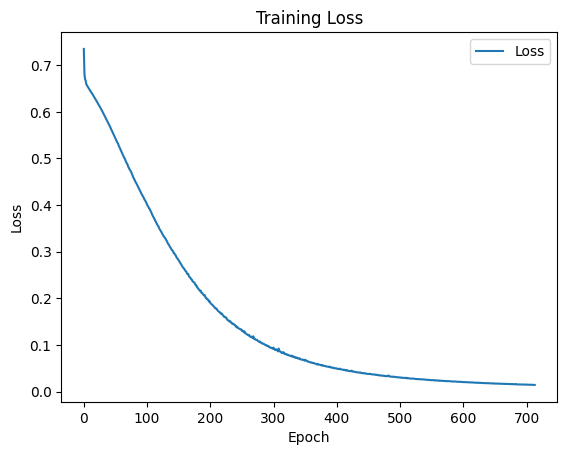

Accuracy: 0.8742603550295858
Precision: 0.8742592282623679
Recall: 0.8771929824561403


In [10]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(32,32), activation='relu', max_iter=1000, solver='sgd')
classifier.fit(train_inputs, train_outputs)

outputs = classifier.predict(test_inputs)
plot_classifier(classifier.loss_curve_)

acc = accuracy_score(test_outputs, outputs)
prec = precision_score(test_outputs, outputs, average="weighted")
recall = recall_score(test_outputs, outputs)
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {recall}")

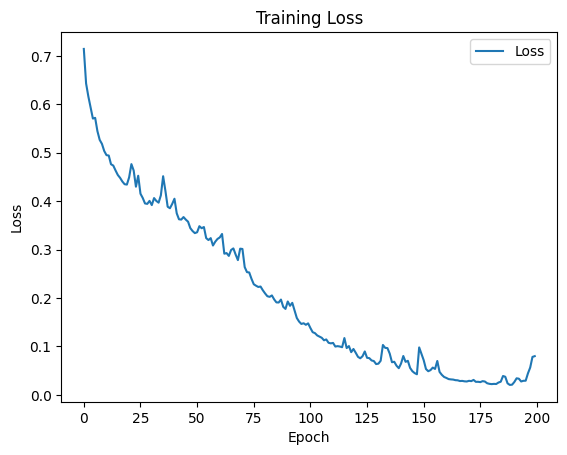

Accuracy: 0.8816568047337278
Precision: 0.8845686074080028
Recall: 0.9269005847953217


In [11]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(32,32), activation='relu', max_iter=1000, solver='adam')
classifier.fit(train_inputs, train_outputs)

outputs = classifier.predict(test_inputs)
plot_classifier(classifier.loss_curve_)

acc = accuracy_score(test_outputs, outputs)
prec = precision_score(test_outputs, outputs, average="weighted")
recall = recall_score(test_outputs, outputs)
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {recall}")

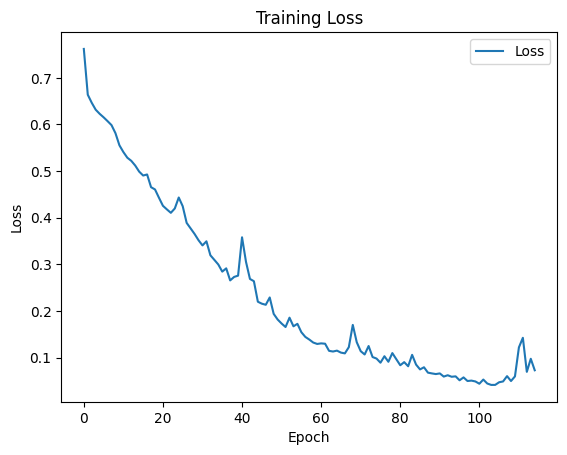

Accuracy: 0.8905325443786982
Precision: 0.8906786087215952
Recall: 0.8830409356725146


In [12]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(64,64), activation='relu', max_iter=1000, solver='adam')
classifier.fit(train_inputs, train_outputs)

outputs = classifier.predict(test_inputs)
plot_classifier(classifier.loss_curve_)

acc = accuracy_score(test_outputs, outputs)
prec = precision_score(test_outputs, outputs, average="weighted")
recall = recall_score(test_outputs, outputs)
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {recall}")

# ANN (Manual)

In [13]:
def sigmoid_derivative(x):
    return x * (1 - x)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W2, X, Y):
    dZ2 = A2 - one_hot(Y)
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

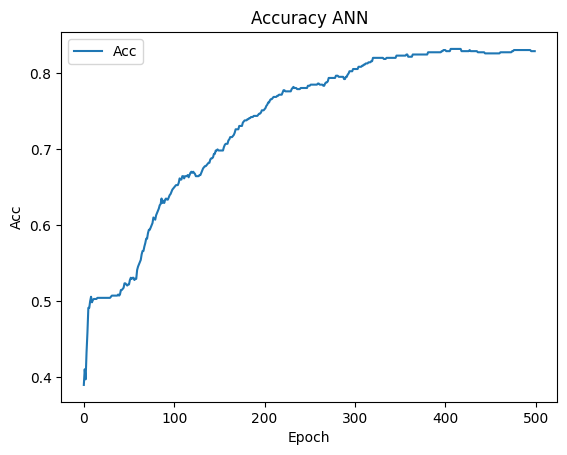

In [20]:

def prediction(A2):
    return np.argmax(A2, 0)

def accuracy(prediction, Y):
    return np.sum(prediction == Y) / Y.size

def train(X, Y, learning_rate = 0.1, epochs = 500):
    
    W1 = np.random.randn(16, 3072) * 0.05
    W2 = np.random.randn(2, 16) * 0.05
    b1 = np.random.randn(16, 1) * 0.05
    b2 = np.random.randn(2, 1) * 0.05
    accuracy_list = []

    for _ in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1    
        W2 = W2 - learning_rate * dW2 
        b2 = b2 - learning_rate * db2
        predicted = prediction(A2)
        accuracy_list.append(accuracy(predicted, Y))
    return W1, b1, W2, b2, accuracy_list

data = np.column_stack((train_inputs, train_outputs))
m, n = data.shape
data_train = data[500:m].T
Y_train = data_train[-1]
Y_train = Y_train.astype(int)
X_train = data_train[0:n-1]

W1, b1, W2, b2, accuracy_list = train(X_train, Y_train)

plt.plot(accuracy_list, label='Acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Accuracy ANN')
plt.legend()
plt.show()

# CNN (manual)

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 

2024-04-26 15:27:16.940706: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 15:27:17.630199: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
X_train = [np.reshape(train_inputs[i],(32,32,3)) for i in range(len(train_inputs))]
X_train = np.array(X_train)
Y_train = to_categorical(train_outputs, num_classes=2)

X_test = [np.reshape(test_inputs[i],(32,32,3)) for i in range(len(test_inputs))]
X_test = np.array(X_test)
Y_test = to_categorical(test_outputs, num_classes=2)

In [17]:
model = Sequential()#add model layers

# model.add(Convolution2D(64, 3, activation='relu', data_format='channels_last', input_shape=(32, 32, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Convolution2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(2, activation='softmax'))

model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

/home/albert/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-26 15:27:18.836439: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           202 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721,198 (2.75 MB)

 Trainable params: 721,198 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
cnn = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200)

Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4823 - loss: 0.7522 - val_accuracy: 0.4497 - val_loss: 0.7025
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4751 - loss: 0.7371 - val_accuracy: 0.4837 - val_loss: 0.6982
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5061 - loss: 0.7198 - val_accuracy: 0.5015 - val_loss: 0.6964
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5065 - loss: 0.7106 - val_accuracy: 0.5030 - val_loss: 0.6953
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5184 - loss: 0.7063 - val_accuracy: 0.5059 - val_loss: 0.6942
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4834 - loss: 0.7256 - val_accuracy: 0.5133 - val_loss: 0.6929
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4990 - loss: 0.7233 - val_accuracy: 0.5222 - val_loss: 0.6916
Epoch 8/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4890 - loss: 0.7218 - val_accuracy: 0.

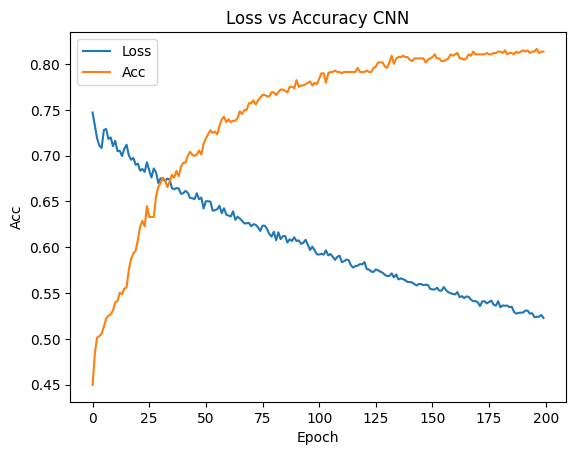

In [19]:
plt.plot(cnn.history['loss'], label='Loss')
plt.plot(cnn.history['val_accuracy'], label='Acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.title('Loss vs Accuracy CNN')
plt.legend()
plt.show()